In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_context('paper')
sns.set_palette('colorblind')

In [2]:
def payoff(x, x0, n):
    a = 5
    b = 3
    return (a * (x + (n-1) * x0) + b * (n-1) * x0) / n - 1/2 * x**2

Text(0.5, 1.0, "Different Payoff functions according to partner's investment")

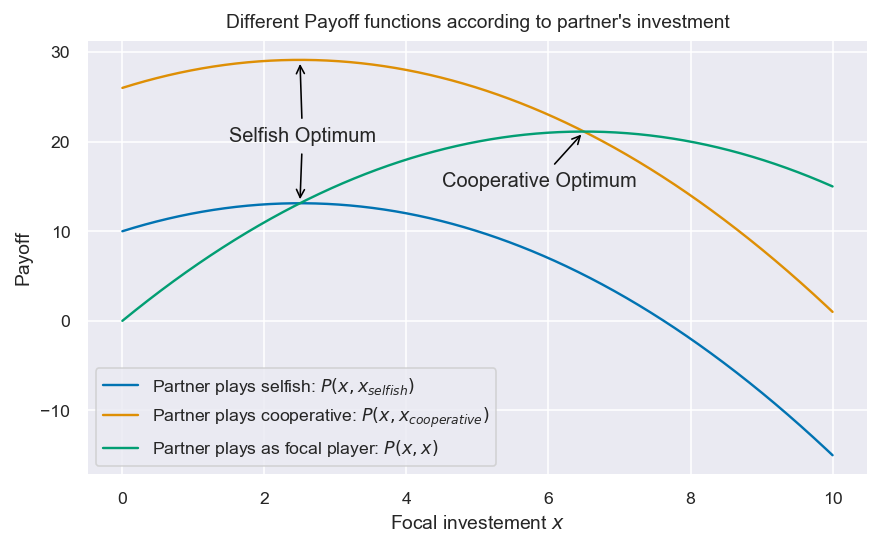

In [20]:
x = np.linspace(0, 10, 1000)
plt.figure(figsize=(7, 4))
plt.plot(x, payoff(x, 2.5, 2), label="Partner plays selfish: $P(x, x_{selfish})$")
plt.plot(x, payoff(x, 6.5, 2), label="Partner plays cooperative: $P(x, x_{cooperative})$")

plt.plot(x, payoff(x, x, 2), label="Partner plays as focal player: $P(x, x)$")
plt.annotate("Selfish Optimum", (2.5, payoff(2.5, 2.5, 2)), (1.5, 20), arrowprops=dict(edgecolor='black', arrowstyle="->"))
plt.annotate("Selfish Optimum", (2.5, payoff(2.5, 6.5, 2)), (1.5, 20), alpha=0, arrowprops=dict(edgecolor='black', arrowstyle="->"))
plt.annotate("Cooperative Optimum", (6.5, payoff(6.5, 6.5, 2)), (4.5, 15), arrowprops=dict(edgecolor='black', arrowstyle="->"))

plt.legend()
plt.ylabel('Payoff')
plt.xlabel('Focal investement $x$')
plt.title("Different Payoff functions according to partner's investment")
#plt.savefig('/home/pecoffet/Documents/work/MaterialandMethods/payoff.pdf')